 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
#df = pd.DataFrame(data)

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)
whale_returns_df.head()


/var/folders/53/8c8ndl7n0n12sv75ng8kmxgc0000gn/T/ipykernel_7352/3169667307.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns_df = pd.read_csv(whale_returns_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_returns_df.head()

/var/folders/53/8c8ndl7n0n12sv75ng8kmxgc0000gn/T/ipykernel_7352/2430352545.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns_df = pd.read_csv(algo_returns_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)



/var/folders/53/8c8ndl7n0n12sv75ng8kmxgc0000gn/T/ipykernel_7352/2459591654.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_history = pd.read_csv(sp500_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
/var/folders/53/8c8ndl7n0n12sv75ng8kmxgc0000gn/T/ipykernel_7352/2459591654.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history = pd.read_csv(sp500_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [9]:
# Check Data Types

sp500_history.dtypes
sp500_history

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [10]:
# Fix Data Types

sp500_history["Close"] = sp500_history["Close"].str.replace("$", "").astype("float")

In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ["S&P 500"]
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis=1)

combined_returns.dropna(inplace=True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

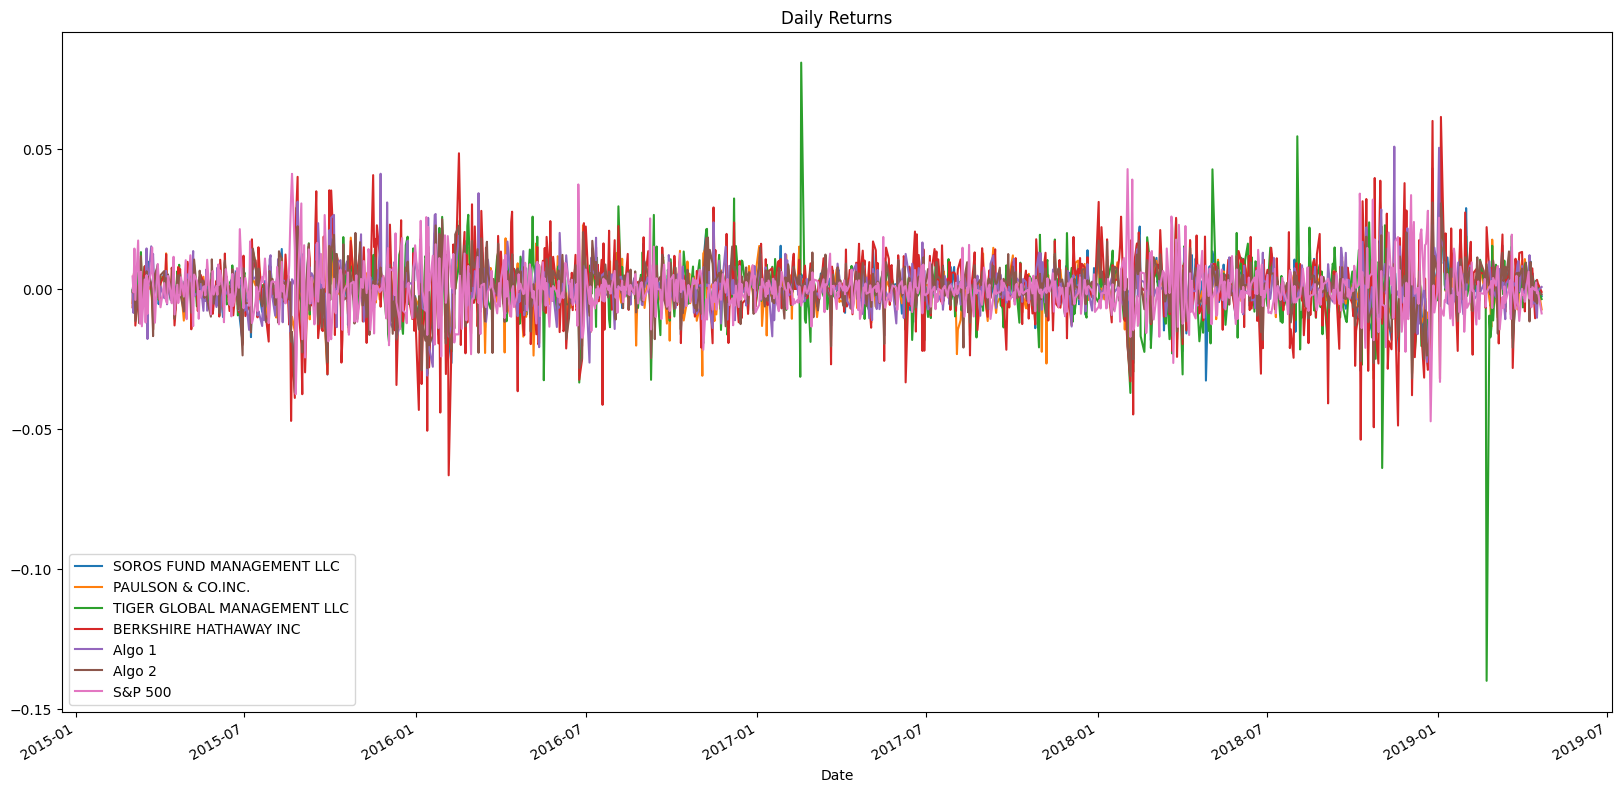

In [15]:
# Plot daily returns of all portfolios
combined_returns.plot(title = "Daily Returns", figsize = (20, 10))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

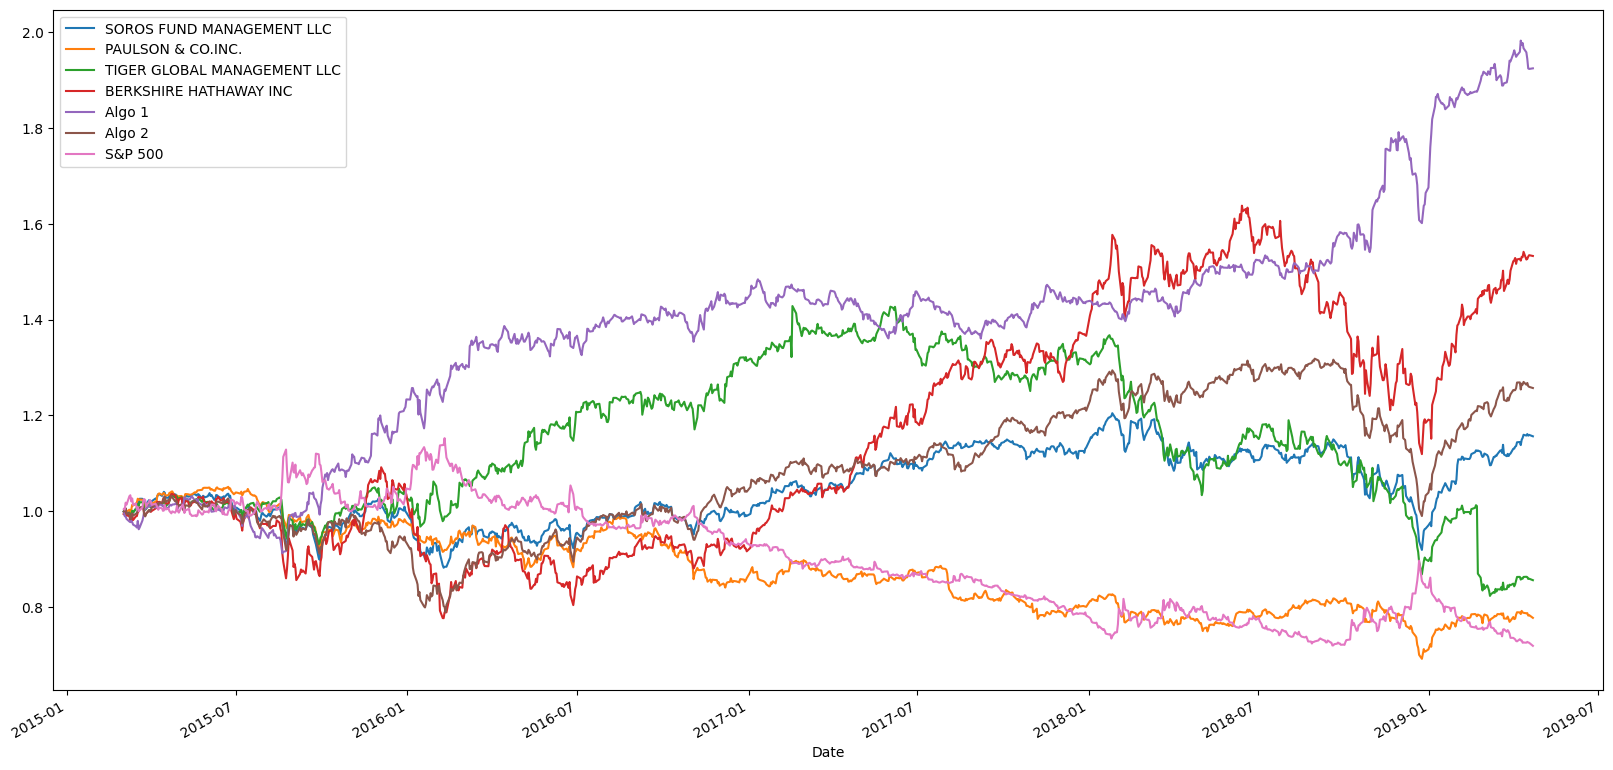

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize = (20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Portfolio Risk'}>

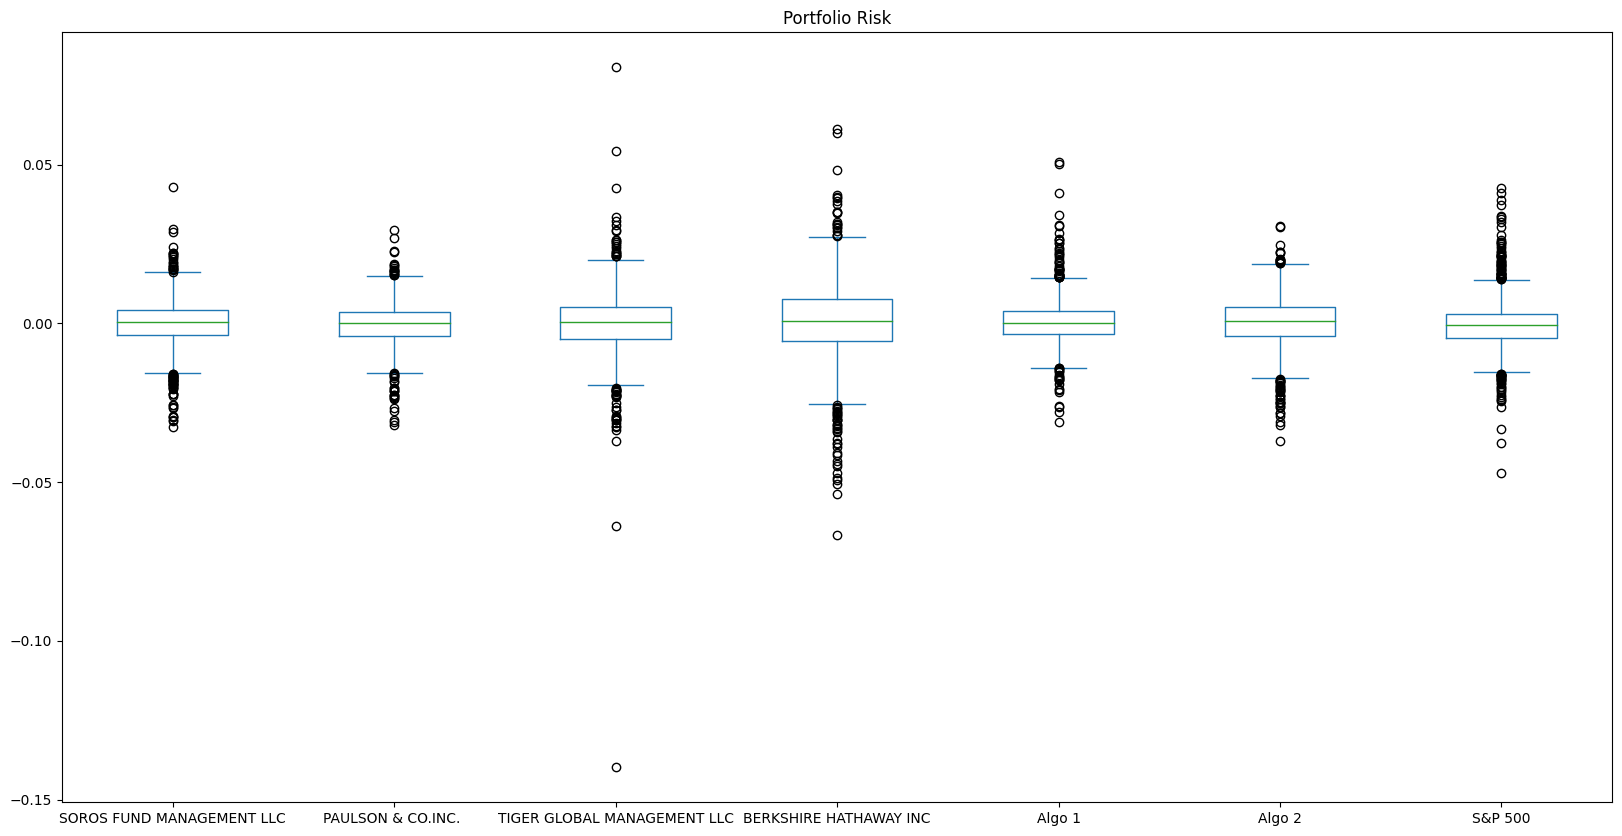

In [17]:
# Box plot to visually show risk
combined_returns.plot.box(title = "Portfolio Risk", figsize = (20, 10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std().sort_values(ascending = True)
daily_std

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
#sp500_daily_returns_std = daily_std["sp500_daily_return"]
# Determine which portfolios are riskier than the S&P 500
#portfolios_riskier_than_SP500 = [daily_std > sp500_daily_returns_std]
#portfolios_riskier_than_SP500

# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = combined_returns["S&P 500"].std()

# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = daily_std[daily_std > sp500_daily_std]

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

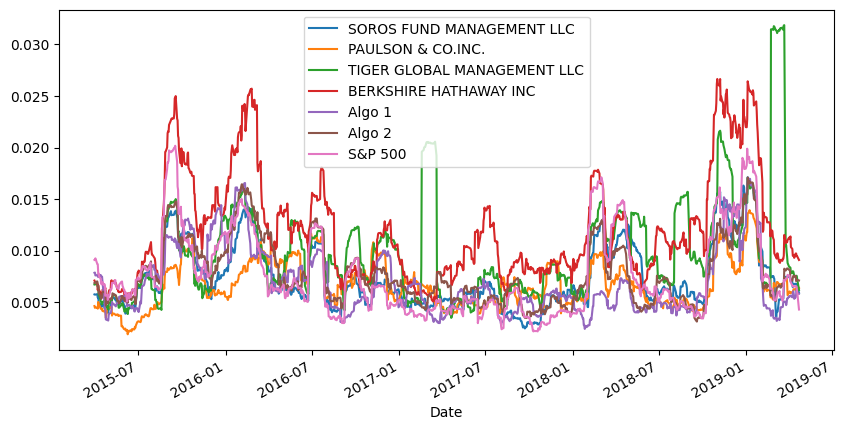

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(10,5))

### Calculate and plot the correlation

<Axes: >

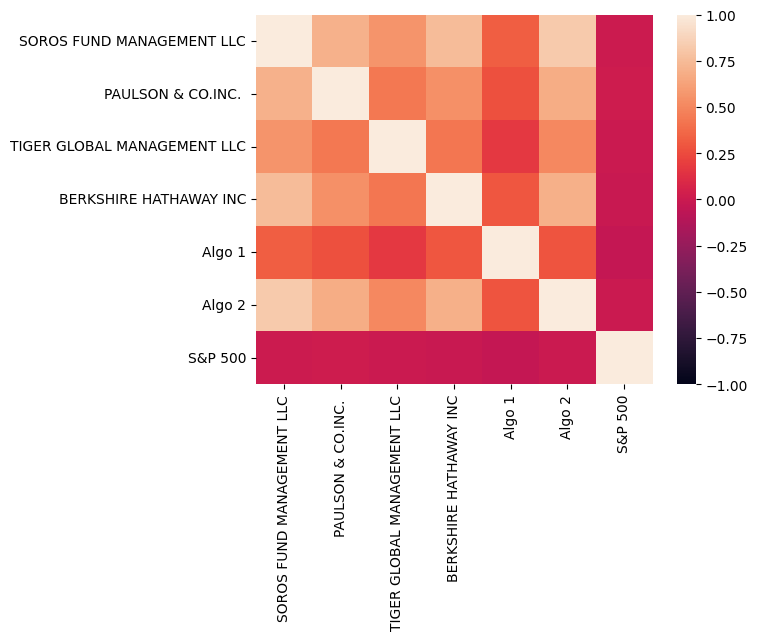

In [22]:
# Calculate the correlation
import seaborn as sns
correlation = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

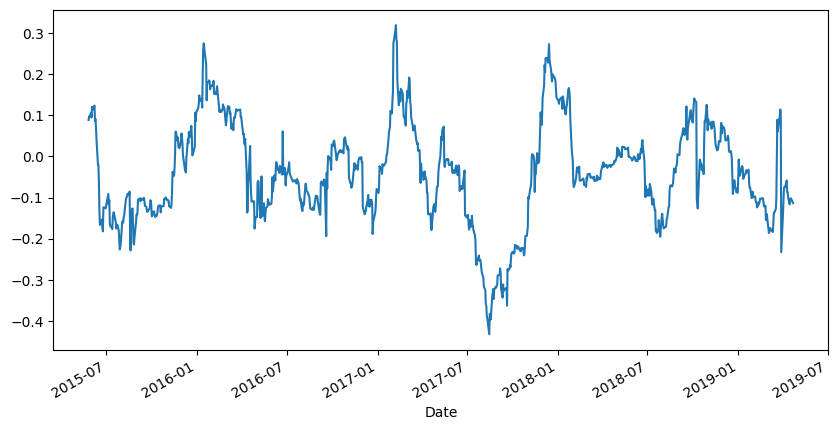

In [23]:
# Calculate covariance of a single portfolio
covariance = combined_returns["Algo 1"].rolling(window=60).cov(combined_returns["S&P 500"])
# Calculate variance of S&P 500
variance = combined_returns["S&P 500"].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(10,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
ewm_rolling = combined_returns.ewm(span=21).std()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios'}>

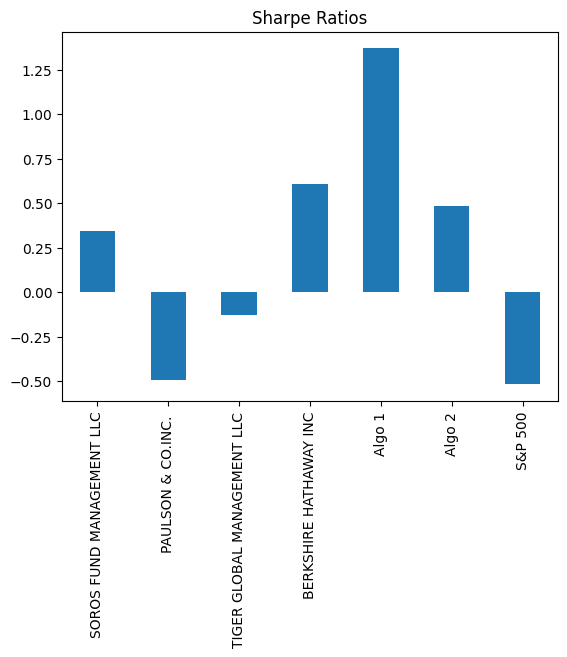

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!


In conclusion, Algo 1 portfolio has low volatility, stable returns, high correlation with other portfolios, has the highest Sharpe ratio and its beta remains less than 1 which indicates the best risk-adjusted performance compared to the rest.



---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
aapl_history_csv = Path("/Users/kevingiraldo/Documents/Fintech Course Materials/Module 4 Challenge Files/Resources/aapl_historical.csv")
aapl_history_df = pd.read_csv(aapl_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
aapl_history_df = aapl_history_df.drop(columns = ["Symbol"])
aapl_history_df.head()

/var/folders/53/8c8ndl7n0n12sv75ng8kmxgc0000gn/T/ipykernel_7352/4201891406.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_history_df = pd.read_csv(aapl_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)


,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [28]:
# Reading data from 2nd stock
cost_history_csv = Path("/Users/kevingiraldo/Documents/Fintech Course Materials/Module 4 Challenge Files/Resources/cost_historical.csv")
cost_history_df = pd.read_csv(cost_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
cost_history_df = cost_history_df.drop(columns = ["Symbol"])
cost_history_df.head()

/var/folders/53/8c8ndl7n0n12sv75ng8kmxgc0000gn/T/ipykernel_7352/2932042967.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_history_df = pd.read_csv(cost_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)


,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [29]:
# Reading data from 3rd stock
goog_history_csv = Path("/Users/kevingiraldo/Documents/Fintech Course Materials/Module 4 Challenge Files/Resources/goog_historical.csv")
goog_history_df = pd.read_csv(goog_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
goog_history_df = goog_history_df.drop(columns = ["Symbol"])
goog_history_df.head()

/var/folders/53/8c8ndl7n0n12sv75ng8kmxgc0000gn/T/ipykernel_7352/2497717689.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_history_df = pd.read_csv(goog_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)


,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [30]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_history_df, cost_history_df, goog_history_df], axis = "columns", join = "inner")
combined_df.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [31]:
# Reset Date index
combined_df.sort_index(inplace = True)

In [32]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ["AAPL", "COST", "GOOG"]
combined_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [33]:
# Calculate daily returns
combined_returns = combined_df.pct_change()
# Drop NAs
combined_returns.dropna(inplace = True)
# Display sample data
combined_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combined_df_weighted_return = combined_returns.dot(weights)
combined_df_weighted_return = combined_df_weighted_return.rename("Custom")

# Display sample data
combined_df_weighted_return.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
Name: Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio = pd.concat([combined_df_weighted_return, combined_returns], axis = "columns", join = "inner")
combined_portfolio.head()

,Custom,AAPL,COST,GOOG
Trade DATE,,,,
2018-05-14,0.000015,-0.002333,0.000613,0.001766
2018-05-15,-0.010064,-0.009088,-0.002042,-0.019060
2018-05-16,0.009403,0.009333,0.016523,0.002354
2018-05-17,-0.001595,-0.006324,0.004479,-0.002940
2018-05-18,-0.006061,-0.003637,-0.003206,-0.011339


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio.dropna()

,Custom,AAPL,COST,GOOG
Trade DATE,,,,
2018-05-14,0.000015,-0.002333,0.000613,0.001766
2018-05-15,-0.010064,-0.009088,-0.002042,-0.019060
2018-05-16,0.009403,0.009333,0.016523,0.002354
2018-05-17,-0.001595,-0.006324,0.004479,-0.002940
2018-05-18,-0.006061,-0.003637,-0.003206,-0.011339
...,...,...,...,...
2019-05-03,0.013329,0.012431,0.007953,0.019602
2019-05-06,-0.004557,-0.015443,-0.001594,0.003366
2019-05-07,-0.018798,-0.026957,-0.016583,-0.012855


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
combined_portfolio_daily_std = combined_portfolio.std().sort_values()
combined_portfolio_annual_std = combined_portfolio_daily_std * np.sqrt(252)
combined_portfolio_annual_std.sort_values()

COST      0.209320
Custom    0.210262
GOOG      0.263554
AAPL      0.296955
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': '21 Day Rolling Standard Deviation'}, xlabel='Trade DATE'>

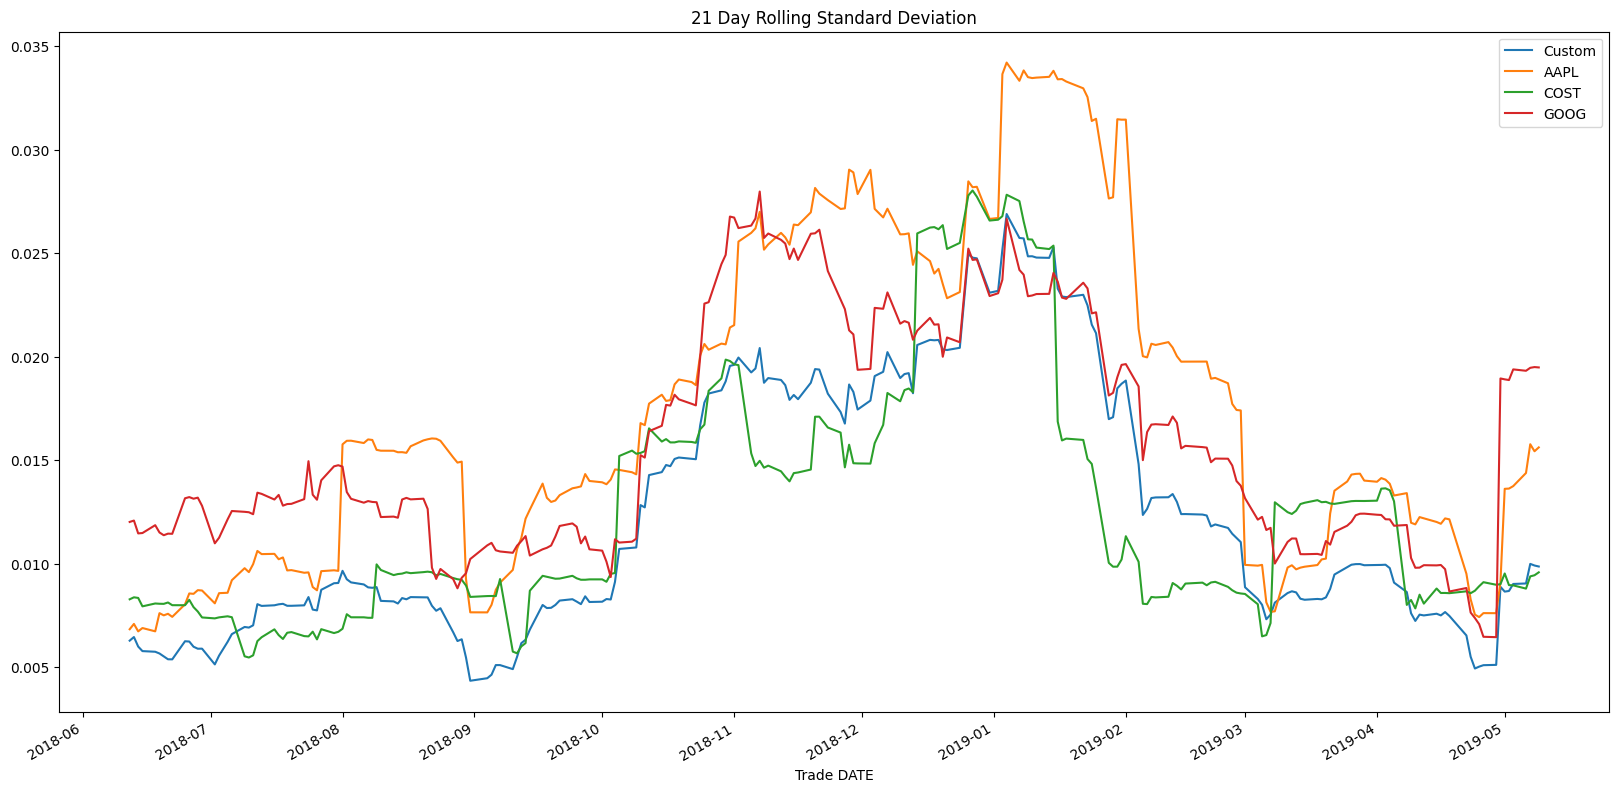

In [38]:
# Calculate rolling standard deviation
combined_portfolio_std21 = combined_portfolio.rolling(window=21).std()

# Plot rolling standard deviation
combined_portfolio_std21.plot(title = "21 Day Rolling Standard Deviation", figsize = (20, 10))

### Calculate and plot the correlation

<Axes: >

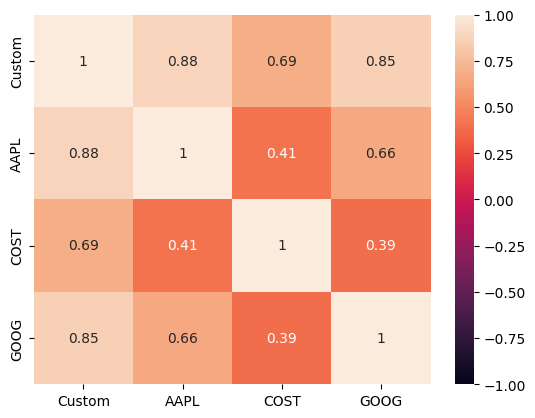

In [39]:
# Calculate and plot the correlation
combined_portfolio_correlation = combined_portfolio.corr()
sns.heatmap(combined_portfolio_correlation, vmin=-1, vmax=1, annot = True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
custom_covariance = combined_portfolio["Custom"].rolling(window=60).cov(combined_portfolio["S&P500"])
custom_covariance

sp500_variance_2 = combined_portfolio["S&P500"].rolling(window=60).var()
sp500_variance_2

custom_beta = custom_covariance / sp500_variance_2

custom_beta.plot(title = "Custom Beta", figsize = (20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios
combined_portfolio_sharpe_ratio = (combined_portfolio.mean() * 252) / (combined_portfolio.std() * np.sqrt(252))
combined_portfolio_sharpe_ratio

Custom    0.701280
AAPL      0.361306
COST      1.160482
GOOG      0.349657
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

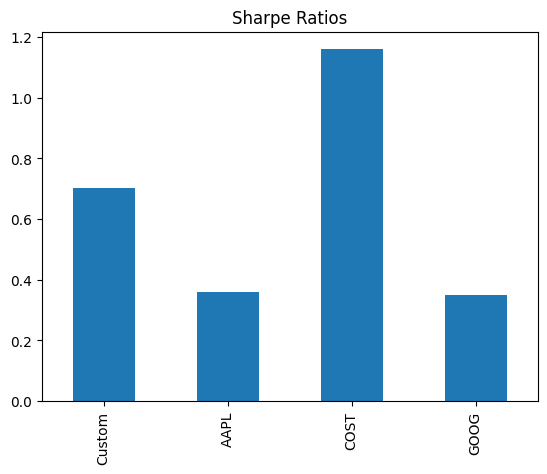

In [42]:
# Visualize the sharpe ratios as a bar plot
combined_portfolio_sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratios")

### How does your portfolio do?

My custom portfolio has a high annualized standard deviation, but only ran with AAPL, COST, and GOOG.